In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/training-validation'

In [ ]:
!unzip "/content/drive/MyDrive/training-validation.zip" 

Archive:  /content/drive/MyDrive/training-validation.zip
   creating: sub01/
  inflating: __MACOSX/._sub01        
  inflating: sub01/Vd02_Sg_066_VS_Set2.csv  
  inflating: __MACOSX/sub01/._Vd02_Sg_066_VS_Set2.csv  
  inflating: sub01/Vd02_Sg_104_VS_Set2.csv  
  inflating: __MACOSX/sub01/._Vd02_Sg_104_VS_Set2.csv  
  inflating: sub01/Vd02_Sg_016_VS_Set2.csv  
  inflating: __MACOSX/sub01/._Vd02_Sg_016_VS_Set2.csv  
  inflating: sub01/Vd01_Sg_082_VS_Set2.csv  
  inflating: __MACOSX/sub01/._Vd01_Sg_082_VS_Set2.csv  
  inflating: sub01/Vd01_Sg_006_VS_Set1.csv  
  inflating: __MACOSX/sub01/._Vd01_Sg_006_VS_Set1.csv  
  inflating: sub01/Vd02_Sg_031_VS_Set1.csv  
  inflating: __MACOSX/sub01/._Vd02_Sg_031_VS_Set1.csv  
  inflating: sub01/Vd02_Sg_048_VS_Set2.csv  
  inflating: __MACOSX/sub01/._Vd02_Sg_048_VS_Set2.csv  
  inflating: sub01/Vd01_Sg_021_VS_Set2.csv  
  inflating: __MACOSX/sub01/._Vd01_Sg_021_VS_Set2.csv  
  inflating: sub01/Vd02_Sg_041_VS_Set1.csv  
  inflating: __MACOSX/sub01/._Vd

In [ ]:
mkdir data

In [ ]:
mv sub01 sub02 sub03 sub05 data/

In [ ]:
import tensorflow
tensorflow.keras.backend.clear_session()

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense,Dropout,InputLayer,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
files = glob.glob("data/*/*.csv")
files[:5]

['data/sub02/Vd01_Sg_006_VS_Set2.csv',
 'data/sub02/Vd01_Sg_001_VS_Set3.csv',
 'data/sub02/Vd01_Sg_003_VS_Set2.csv',
 'data/sub02/Vd01_Sg_001_VS_Set1.csv',
 'data/sub02/Vd01_Sg_002_VS_Set1.csv']

In [ ]:
file_data = pd.read_csv('data/sub03/Vd01_Sg_026_VS_Set1.csv',header=None)
file_data = file_data.loc[:,1:]
file_data.columns = ["input1","input2","input3","output"]
file_data.head()

,input1,input2,input3,output
0,160,64,96,0
1,160,61,96,0
2,161,59,96,0
3,161,58,96,0
4,161,58,96,0


In [ ]:
file_data.shape

(31, 4)

In [ ]:
data = pd.concat([pd.read_csv(file,header=None) for file in files],ignore_index=True)
data = data.reset_index()
data = data.loc[:,1:]
data.columns = ["input1","input2","input3","target"]
data.head()

,input1,input2,input3,target
0,123,49,97,0
1,124,44,97,0
2,124,45,97,0
3,129,45,97,0
4,138,46,97,0


In [ ]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns in our dataset")

There are 18662 Rows and 4 Columns in our dataset


## Data Preprocessing
[1] Data Cleaning    
[2] One Hot Encoding    
[3] scale the data using MinMaxScaler     
[4] Concatenate data into time steps

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18662 entries, 0 to 18661
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input1  18662 non-null  int64 
 1   input2  18662 non-null  int64 
 2   input3  18662 non-null  object
 3   target  18662 non-null  object
dtypes: int64(2), object(2)
memory usage: 583.3+ KB


In [ ]:
data.isnull().sum()

input1    0
input2    0
input3    0
target    0
dtype: int64

In [ ]:
data['target'].value_counts()

0    9827
1    6541
#    1178
2    1116
Name: target, dtype: int64

In [ ]:
data.head()

,input1,input2,input3,target
0,123,49,97,0
1,124,44,97,0
2,124,45,97,0
3,129,45,97,0
4,138,46,97,0


In [ ]:
data = data[data['target'] != "#"]
# data.reset_index()

In [ ]:
data['target'].value_counts()

0    9827
1    6541
2    1116
Name: target, dtype: int64

In [ ]:
data['input3'].unique()

array([97, 100, 99, 98, 96, 95, 92, 91, 94, 93, -1, 90, 54, 53, 80, 88,
       '--1', '-1', 0, 89, 52, 12, 16, 10, 40, 25, 87, 86, 51, 62, 65, 67,
       68, 79, 85, 82, 81, 83, 55, 19, 70, 75, 73, 74, 49, 50, 9, 45],
      dtype=object)

In [ ]:
data['input3'] = data['input3'].replace('--1',-1)

<ipython-input-67-c9314d7145b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input3'] = data['input3'].replace('--1',-1)


In [ ]:
data['input3'].unique()

array([97, 100, 99, 98, 96, 95, 92, 91, 94, 93, -1, 90, 54, 53, 80, 88,
       '-1', 0, 89, 52, 12, 16, 10, 40, 25, 87, 86, 51, 62, 65, 67, 68,
       79, 85, 82, 81, 83, 55, 19, 70, 75, 73, 74, 49, 50, 9, 45],
      dtype=object)

In [ ]:
data.shape

(17484, 4)

## One Hot Encoder

In [ ]:
X = data.iloc[:,:3]
Y = data.iloc[:,3:]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17484 entries, 0 to 18630
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input1  17484 non-null  int64 
 1   input2  17484 non-null  int64 
 2   input3  17484 non-null  object
dtypes: int64(2), object(1)
memory usage: 546.4+ KB


In [ ]:
Y.value_counts()

target
0         9827
1         6541
2         1116
dtype: int64

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
Y=Y.values


In [ ]:
x_train.shape, x_test.shape , y_train.shape, y_test.shape

In [ ]:
def prepre_data(x_data,y_data,time_step=31):
    indcies_num = int(x_data.shape[0]  / time_step) 
    x_numpy = np.zeros((indcies_num,time_step,x_data.shape[1]))
    y_numpy = np.zeros((indcies_num,1))
    
    for idx in range(0,indcies_num):
        x_numpy[idx] = x_data[idx* time_step :(idx+1)*time_step]
        y_numpy[idx] = y_data[((idx+1)*time_step)-1]  
    return x_numpy,y_numpy
    

In [ ]:
x_train,y_train = prepre_data(X_scaled,Y)

In [ ]:
x_train.shape 

(564, 31, 3)

In [ ]:
x_train.shape,y_train.shape

((564, 31, 3), (564, 1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.10,random_state=42)

In [ ]:
input_shape = (31, 3)

In [ ]:
gru_model = Sequential([
    InputLayer(input_shape=input_shape),
    GRU(31,return_sequences=True),
    # GRU(31,return_sequences=True),
    GRU(18,return_sequences=True),
    GRU(16,return_sequences=True),
    GRU(18),
    # tensorflow.keras.layers.Flatten(),
    Dense(10, activation='relu'),
    Dense(3,activation='softmax')
])

In [ ]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 31, 31)            3348      
                                                                 
 gru_1 (GRU)                 (None, 31, 18)            2754      
                                                                 
 gru_2 (GRU)                 (None, 31, 16)            1728      
                                                                 
 gru_3 (GRU)                 (None, 18)                1944      
                                                                 
 dense (Dense)               (None, 10)                190       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 9,997
Trainable params: 9,997
Non-trainabl

In [ ]:
optimizer = Adam()
import tensorflow as tf
# optimizer = tf.keras.optimizers.SGD()
gru_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history = gru_model.fit(x_train, y_train,epochs=150,batch_size=32,validation_data=(x_test, y_test))
# history = gru_model.fit(x_train, y_train,epochs=40,batch_size=8,validation_split=0.2)

Epoch 1/150
16/16 [==============================] - 8s 116ms/step - loss: 1.0960 - accuracy: 0.4497 - val_loss: 1.0504 - val_accuracy: 0.6140
Epoch 2/150
16/16 [==============================] - 0s 17ms/step - loss: 1.0169 - accuracy: 0.6430 - val_loss: 0.9287 - val_accuracy: 0.7193
Epoch 3/150
16/16 [==============================] - 0s 17ms/step - loss: 0.8753 - accuracy: 0.6036 - val_loss: 0.7527 - val_accuracy: 0.6491
Epoch 4/150
16/16 [==============================] - 0s 16ms/step - loss: 0.7545 - accuracy: 0.6607 - val_loss: 0.6215 - val_accuracy: 0.8070
Epoch 5/150
16/16 [==============================] - 0s 16ms/step - loss: 0.6718 - accuracy: 0.7160 - val_loss: 0.5721 - val_accuracy: 0.7895
Epoch 6/150
16/16 [==============================] - 0s 16ms/step - loss: 0.6597 - accuracy: 0.7120 - val_loss: 0.5612 - val_accuracy: 0.8070
Epoch 7/150
16/16 [==============================] - 0s 17ms/step - loss: 0.6535 - accuracy: 0.7219 - val_loss: 0.5602 - val_accuracy: 0.7895
Epoch

In [ ]:
print("Model Performance on test set")
result = gru_model.evaluate(x_test,y_test)
print(dict(zip(gru_model.metrics_names, result)))

Model Performance on test set
2/2 [==============================] - 0s 10ms/step - loss: 0.5709 - accuracy: 0.7719
{'loss': 0.5709192156791687, 'accuracy': 0.7719298005104065}


In [ ]:
def plot_graph(history,string):
    plt.plot(history.history[string],label='training '+string)
    plt.plot(history.history['val_'+string],label='validation '+string)
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.title(string+' vs epochs')
    plt.show

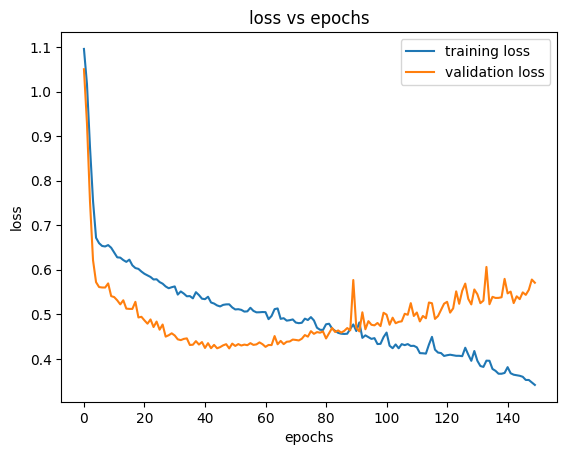

In [ ]:
plot_graph(history,'loss')

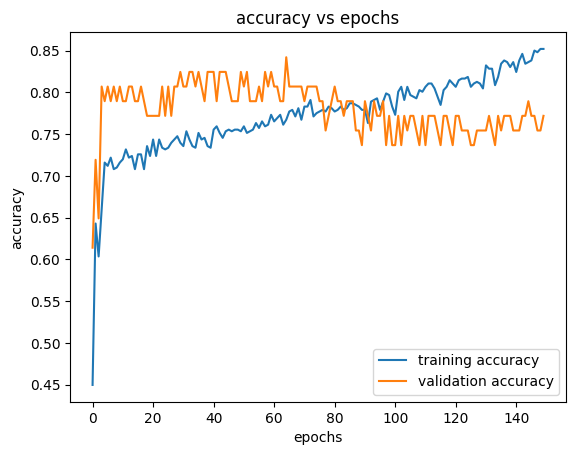

In [ ]:
plot_graph(history,'accuracy')

In [ ]:
gru_model.save("new_model.h5")

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/test.zip"

Mounted at /content/drive
Archive:  /content/drive/MyDrive/test.zip
   creating: test/
  inflating: __MACOSX/._test         
  inflating: test/.DS_Store          
  inflating: __MACOSX/test/._.DS_Store  
   creating: test/sub03/
   creating: test/sub05/
   creating: test/sub02/
   creating: test/sub01/
  inflating: test/sub03/Vd01_Sg_108_VS_Set1.csv  
  inflating: __MACOSX/test/sub03/._Vd01_Sg_108_VS_Set1.csv  
  inflating: test/sub03/Vd01_Sg_082_VS_Set1.csv  
  inflating: __MACOSX/test/sub03/._Vd01_Sg_082_VS_Set1.csv  
  inflating: test/sub03/Vd01_Sg_087_VS_Set1.csv  
  inflating: __MACOSX/test/sub03/._Vd01_Sg_087_VS_Set1.csv  
  inflating: test/sub03/.DS_Store    
  inflating: __MACOSX/test/sub03/._.DS_Store  
  inflating: test/sub03/Vd01_Sg_016_VS_Set1.csv  
  inflating: __MACOSX/test/sub03/._Vd01_Sg_016_VS_Set1.csv  
  inflating: test/sub03/Vd01_Sg_048_VS_Set1.csv  
  inflating: __MACOSX/test/sub03/._Vd01_Sg_048_VS_Set1.csv  
  inflating: test/sub03/Vd01_Sg_073_VS_Set1.csv  
  infl

In [7]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense,Dropout,InputLayer,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import tensorflow as tf

def prepre_data(x_data,y_data,time_step=31):
    indcies_num = int(x_data.shape[0]  / time_step) 
    x_numpy = np.zeros((indcies_num,time_step,x_data.shape[1]))
    y_numpy = np.zeros((indcies_num,1))
    
    for idx in range(0,indcies_num):
        x_numpy[idx] = x_data.iloc[idx* time_step :(idx+1)*time_step]
        y_numpy[idx] = y_data.iloc[(idx*time_step)+1] 
    return x_numpy,y_numpy


def test_model(path):
  files = glob.glob(f"{path}/*/*.csv")
  data = pd.concat([pd.read_csv(file,header=None) for file in files])
  data = data.reset_index()
  data = data.loc[:,1:]
  data.columns = ["input1","input2","input3","target"]
  data = data[data['target'] != "#"]
  data['input3'] = data['input3'].replace('--1',-1)
  X = data.iloc[:,:3]
  Y = data.iloc[:,3:]
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)
  X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
  x_train,y_train = prepre_data(X_scaled,Y)
  gru_model=tf.keras.models.load_model("new_model.h5")
  # predictions = model.predict(x_train)
  # outputs = np.argmax(predictions,axis=1)
  accu=gru_model.evaluate(x_train,y_train)
  print(accu)
  return y_train



In [8]:
y_train  = test_model('/content/test')


4/4 [==============================] - 1s 7ms/step - loss: 0.7543 - accuracy: 0.6961
[0.754280686378479, 0.6960784196853638]
